In [60]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'


In [2]:
# Load train, test datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_test = pd.read_csv('y_test.csv')


In [3]:
# Check the shape of the datasets

train.shape, test.shape, y_test.shape

((39116, 16), (9779, 15), (9779, 1))

In [4]:
# Display the first 3 rows of the train, test, and y_test datasets

display(train.head(3))
display(test.head(3))
display(y_test.head(3))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365


,price
0,80
1,190
2,500


In [5]:
# Check data types of train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# Check data types of test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     7721 non-null   object 
 12  reviews_per_month               77

In [7]:
# Check data types of y_test dataset

y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   9779 non-null   int64
dtypes: int64(1)
memory usage: 76.5 KB


In [8]:
# Check for duplicates in train dataset

train.duplicated().sum()

0

In [9]:
# Check for duplicates in test dataset

test.duplicated().sum()

0

In [10]:
# Check missing data in train dataset

train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:
# Check missing data in test dataset

test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
# Check missing data in y_test dataset

y_test.isnull().sum()

price    0
dtype: int64

In [13]:
# Drop unnecessary columns 'name', 'id', 'host_name', 'last_review' from train, and test datasets
# 'name' and 'id' are not affecting the price of the airbnb
# 'last_review' is not usefull for the predicting price of the airbnb

train = train.drop(['name', 'id', 'host_name', 'last_review'], axis = 1)
test = test.drop(['name', 'id', 'host_name', 'last_review'], axis = 1)

In [14]:
# Check the shape of the train, and test datasets

train.shape, test.shape

((39116, 12), (9779, 11))

<Axes: ylabel='reviews_per_month'>

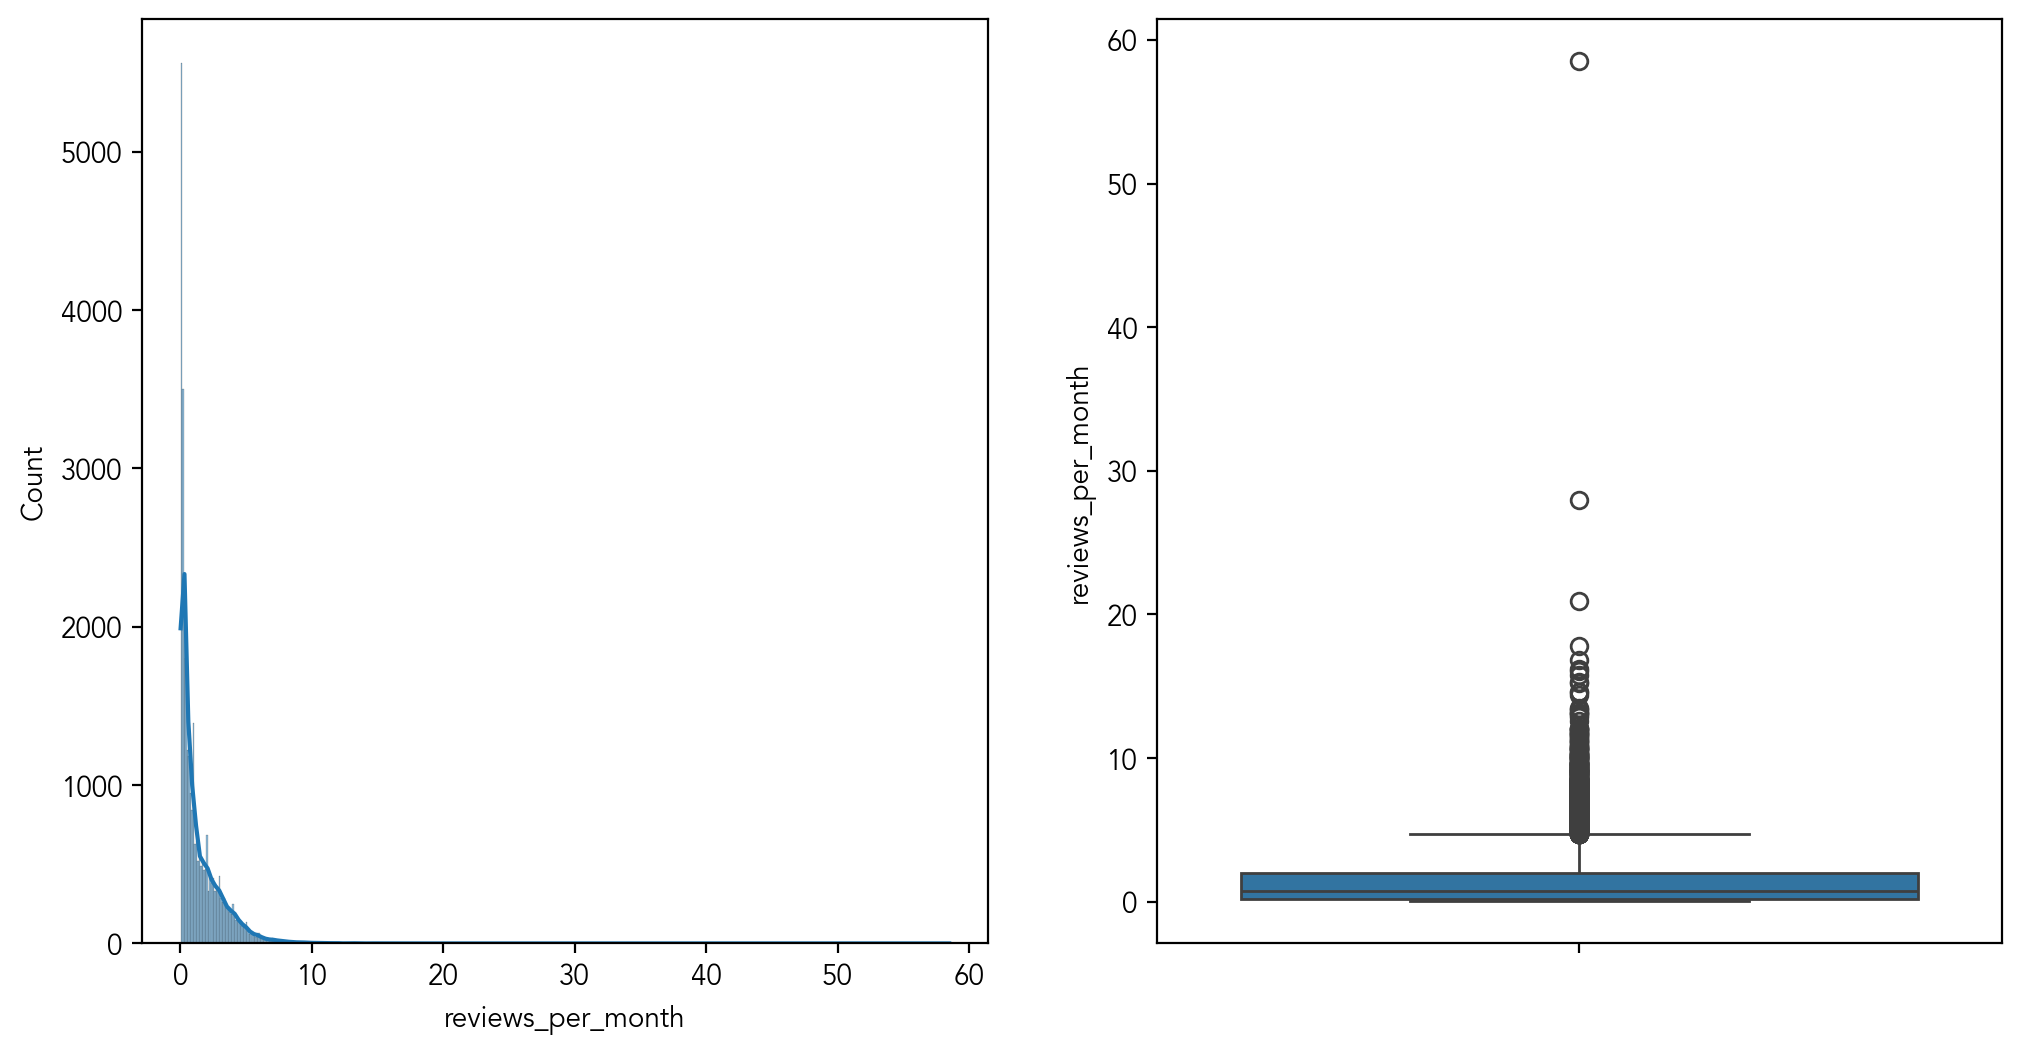

In [15]:
# Undersand the distribution of the reviews_per_month in the dataset

f, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(train['reviews_per_month'], kde = True, ax = ax[0])
sns.boxplot(train['reviews_per_month'], ax = ax[1])

In [27]:
# Describe the reviews_per_month column in the train dataset
# >> The values are between 0.01 and 58.5 in the train dataset and 0.01 and 19.75 in the test dataset

train['reviews_per_month'].describe(), test['reviews_per_month'].describe()

(count    39116.000000
 mean         1.237063
 std          1.525629
 min          0.010000
 25%          0.270000
 50%          0.710000
 75%          1.590000
 max         58.500000
 Name: reviews_per_month, dtype: float64,
 count    9779.000000
 mean        1.238224
 std         1.504559
 min         0.010000
 25%         0.280000
 50%         0.720000
 75%         1.560000
 max        19.750000
 Name: reviews_per_month, dtype: float64)

In [17]:
# Check the median value of the reviews_per_month in the train, and test datasets
# >> 0.71 for train dataset, and 0.72 in test dataset

train['reviews_per_month'].median(), test['reviews_per_month'].median()

(0.71, 0.72)

In [18]:
# Fill missing values in the reviews_per_month column with the median value

train['reviews_per_month'] = train['reviews_per_month'].fillna(train['reviews_per_month'].median())
test['reviews_per_month'] = test['reviews_per_month'].fillna(test['reviews_per_month'].median())

In [19]:
# Check missing data in train, and test datasets
# >> There is no missing data in the train, and test datasets

train.isnull().sum(), test.isnull().sum()

(host_id                           0
 neighbourhood_group               0
 neighbourhood                     0
 latitude                          0
 longitude                         0
 room_type                         0
 price                             0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64,
 host_id                           0
 neighbourhood_group               0
 neighbourhood                     0
 latitude                          0
 longitude                         0
 room_type                         0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64)

<Axes: >

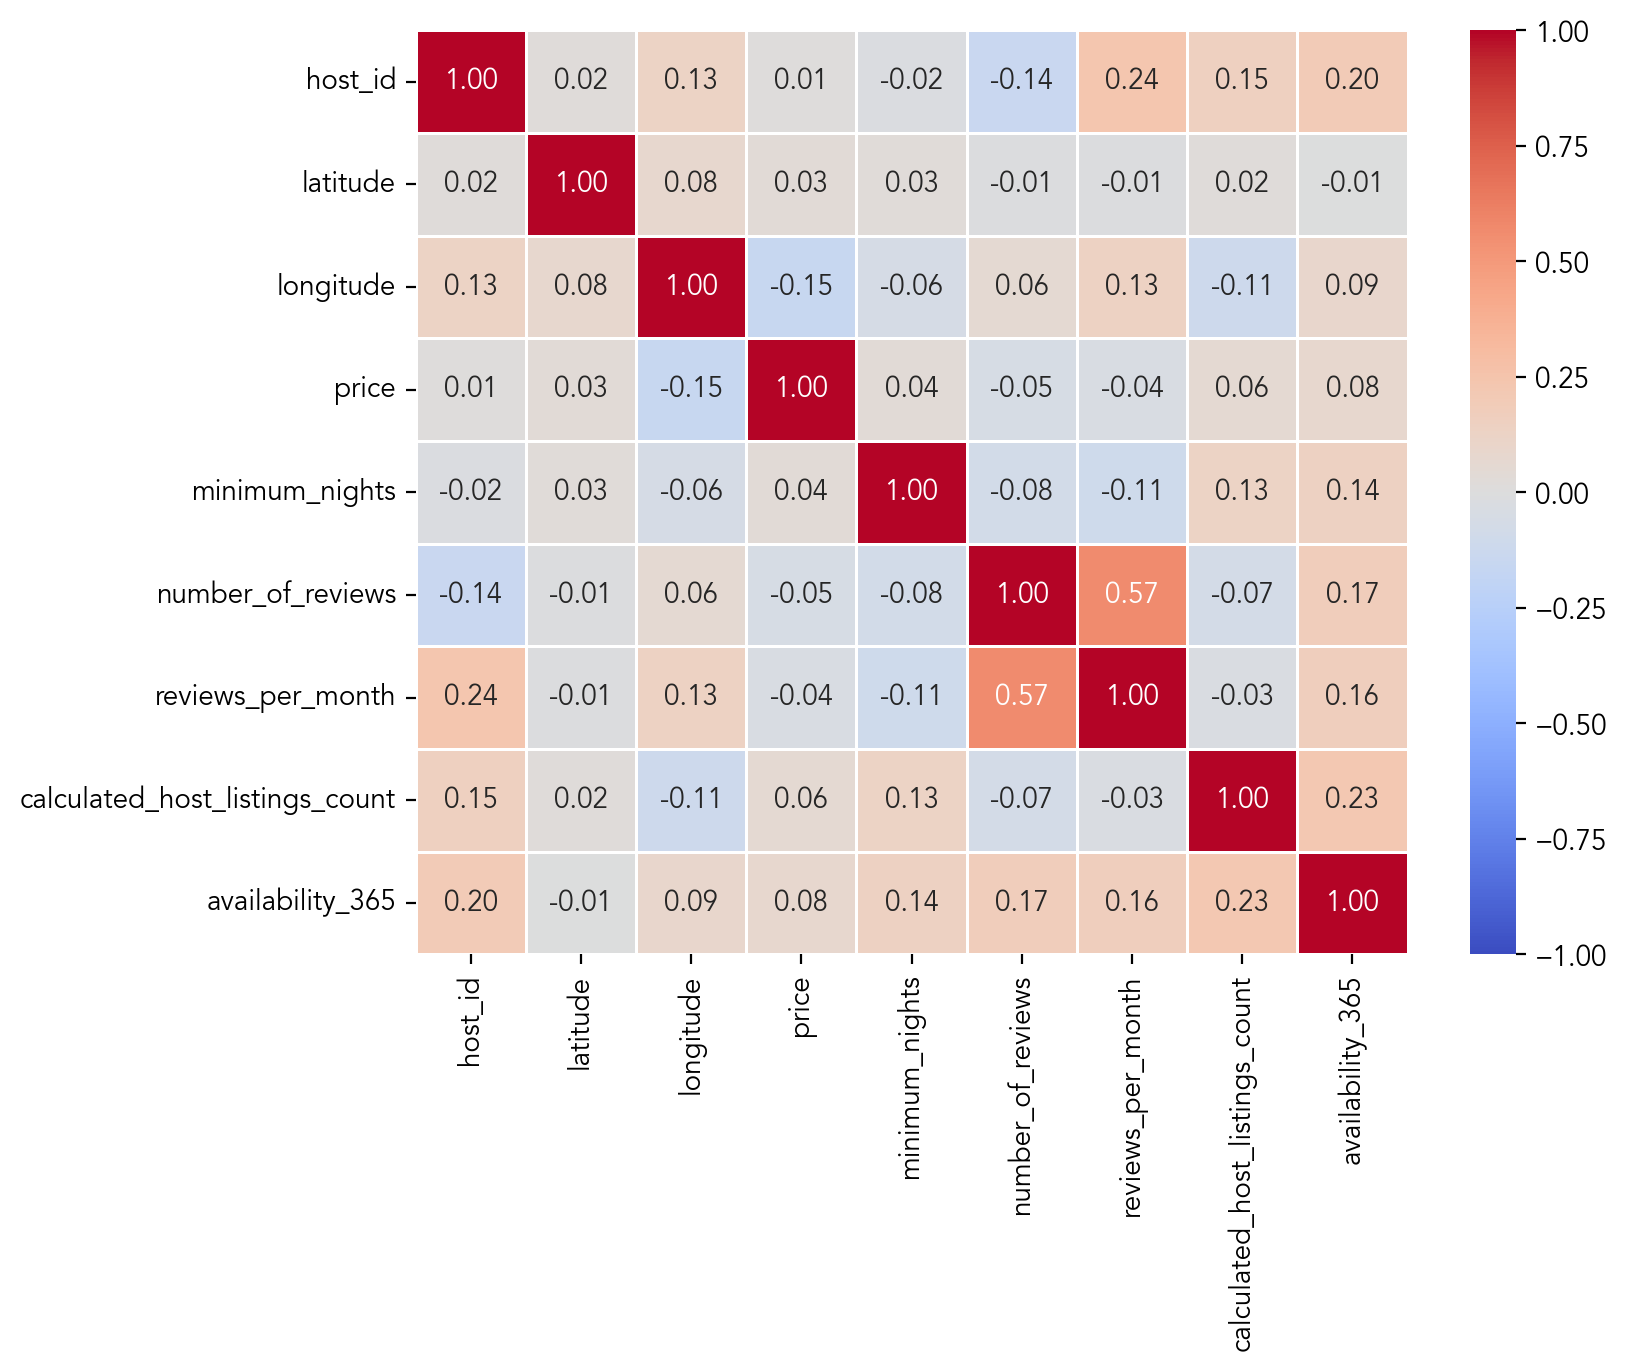

In [26]:
# Check correlation between the features in the train dataset
# >> The correlation shows the week relationship between the features

plt.figure(figsize = (8, 6))
sns.heatmap(train.corr(numeric_only=True), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, vmin = -1, vmax =1)

In [30]:
# Understanding the neighbourhood_group
# >> It is a categorical features with 5 unique values (Manhattan, Brooklyn, Queens, Bronx, and Staten Island)

train['neighbourhood_group'].value_counts(), test['neighbourhood_group'].value_counts()

(neighbourhood_group
 Manhattan        17331
 Brooklyn         16081
 Queens            4530
 Bronx              884
 Staten Island      290
 Name: count, dtype: int64,
 neighbourhood_group
 Manhattan        4330
 Brooklyn         4023
 Queens           1136
 Bronx             207
 Staten Island      83
 Name: count, dtype: int64)

Text(0.5, 1.0, 'Test dataset')

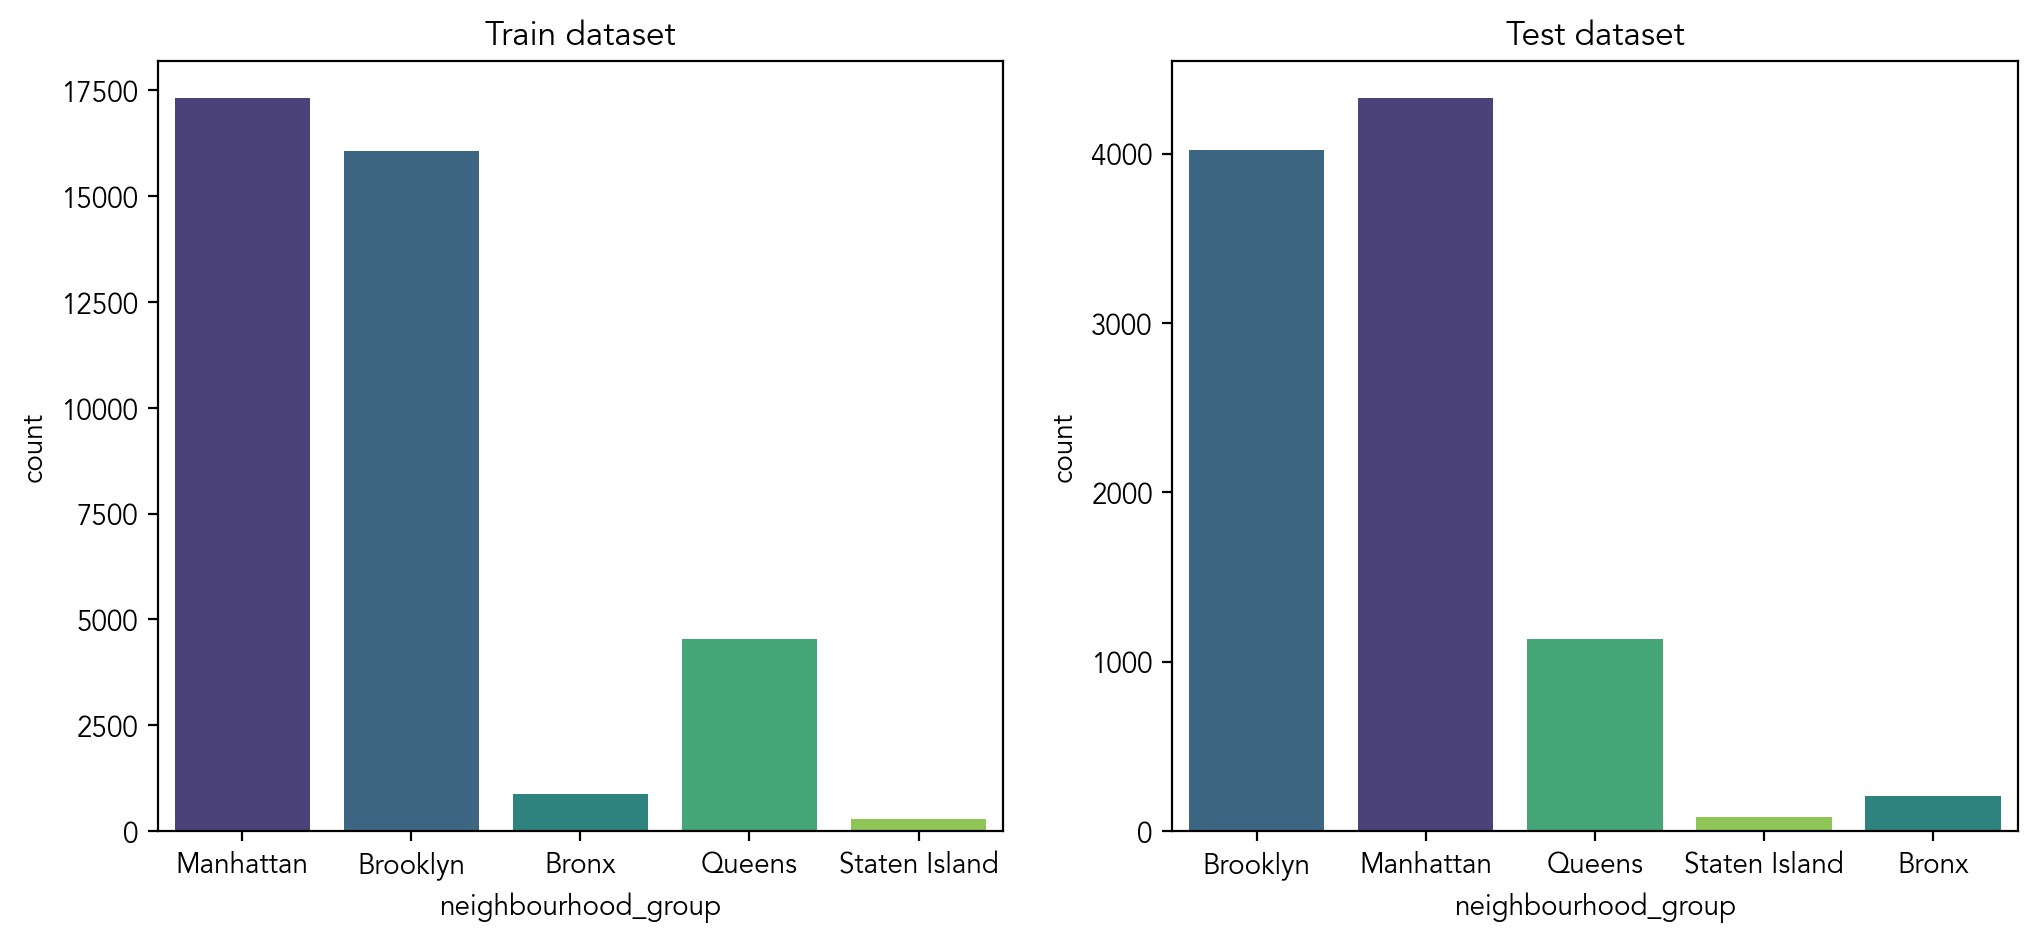

In [89]:
# Plot the neighbourhood_group in the dataset
# >> The most frequent neighbourhood_goup are Manhattan, and Brooklyn in both train, and test datasets

# Get the unique categories
categories = train['neighbourhood_group'].unique()
# Create a color palette
palette = dict(zip(categories, sns.color_palette('viridis', n_colors=len(categories))))

f, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(data = train, x = 'neighbourhood_group', ax = ax[0], palette = palette)
ax[0].set_title('Train dataset')
sns.countplot(data = test, x = 'neighbourhood_group', ax = ax[1], palette = palette)  
ax[1].set_title('Test dataset') 

In [45]:
# Understanding the neighbourhood
# >> 221 categories in the train dataset, and 192 categories in the test dataset

train['neighbourhood'].value_counts(), test['neighbourhood'].value_counts()

(neighbourhood
 Williamsburg          3099
 Bedford-Stuyvesant    2953
 Harlem                2114
 Bushwick              1981
 Hell's Kitchen        1557
                       ... 
 Silver Lake              1
 Richmondtown             1
 Willowbrook              1
 New Dorp                 1
 Fort Wadsworth           1
 Name: count, Length: 221, dtype: int64,
 neighbourhood
 Williamsburg          821
 Bedford-Stuyvesant    761
 Harlem                544
 Bushwick              484
 Upper West Side       442
                      ... 
 Belle Harbor            1
 Sea Gate                1
 Melrose                 1
 Midland Beach           1
 Grymes Hill             1
 Name: count, Length: 192, dtype: int64)

<Axes: xlabel='neighbourhood', ylabel='count'>

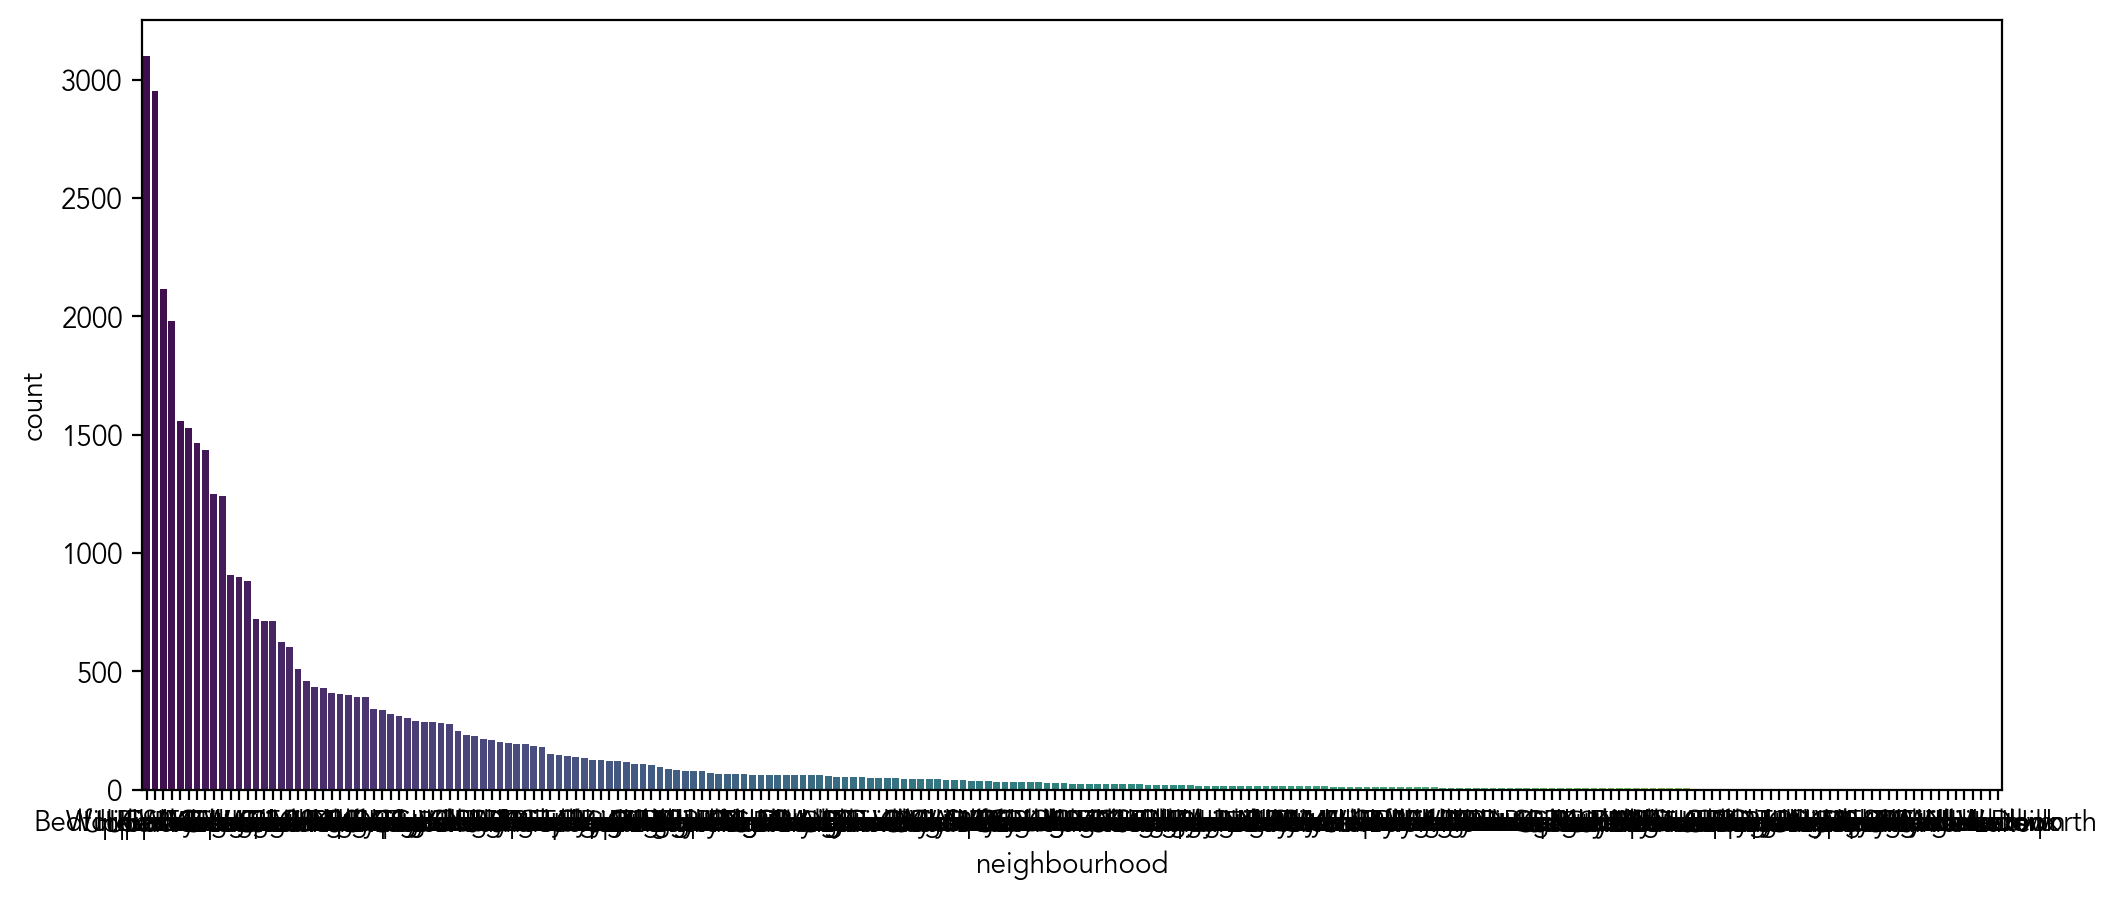

In [62]:
# Understanding the neighbourhood
# >> It is long-tail distribution and the most frequent neighbourhood are Williamsburg, Bedford-Stuyvesant, Harlem, and Bushwick in both train, and test datasets

fig = plt.figure(figsize = (12, 5))
sns.countplot(data = train, x = 'neighbourhood', order = train['neighbourhood'].value_counts().index, palette = 'viridis')

Text(0.5, 1.0, 'Test dataset')

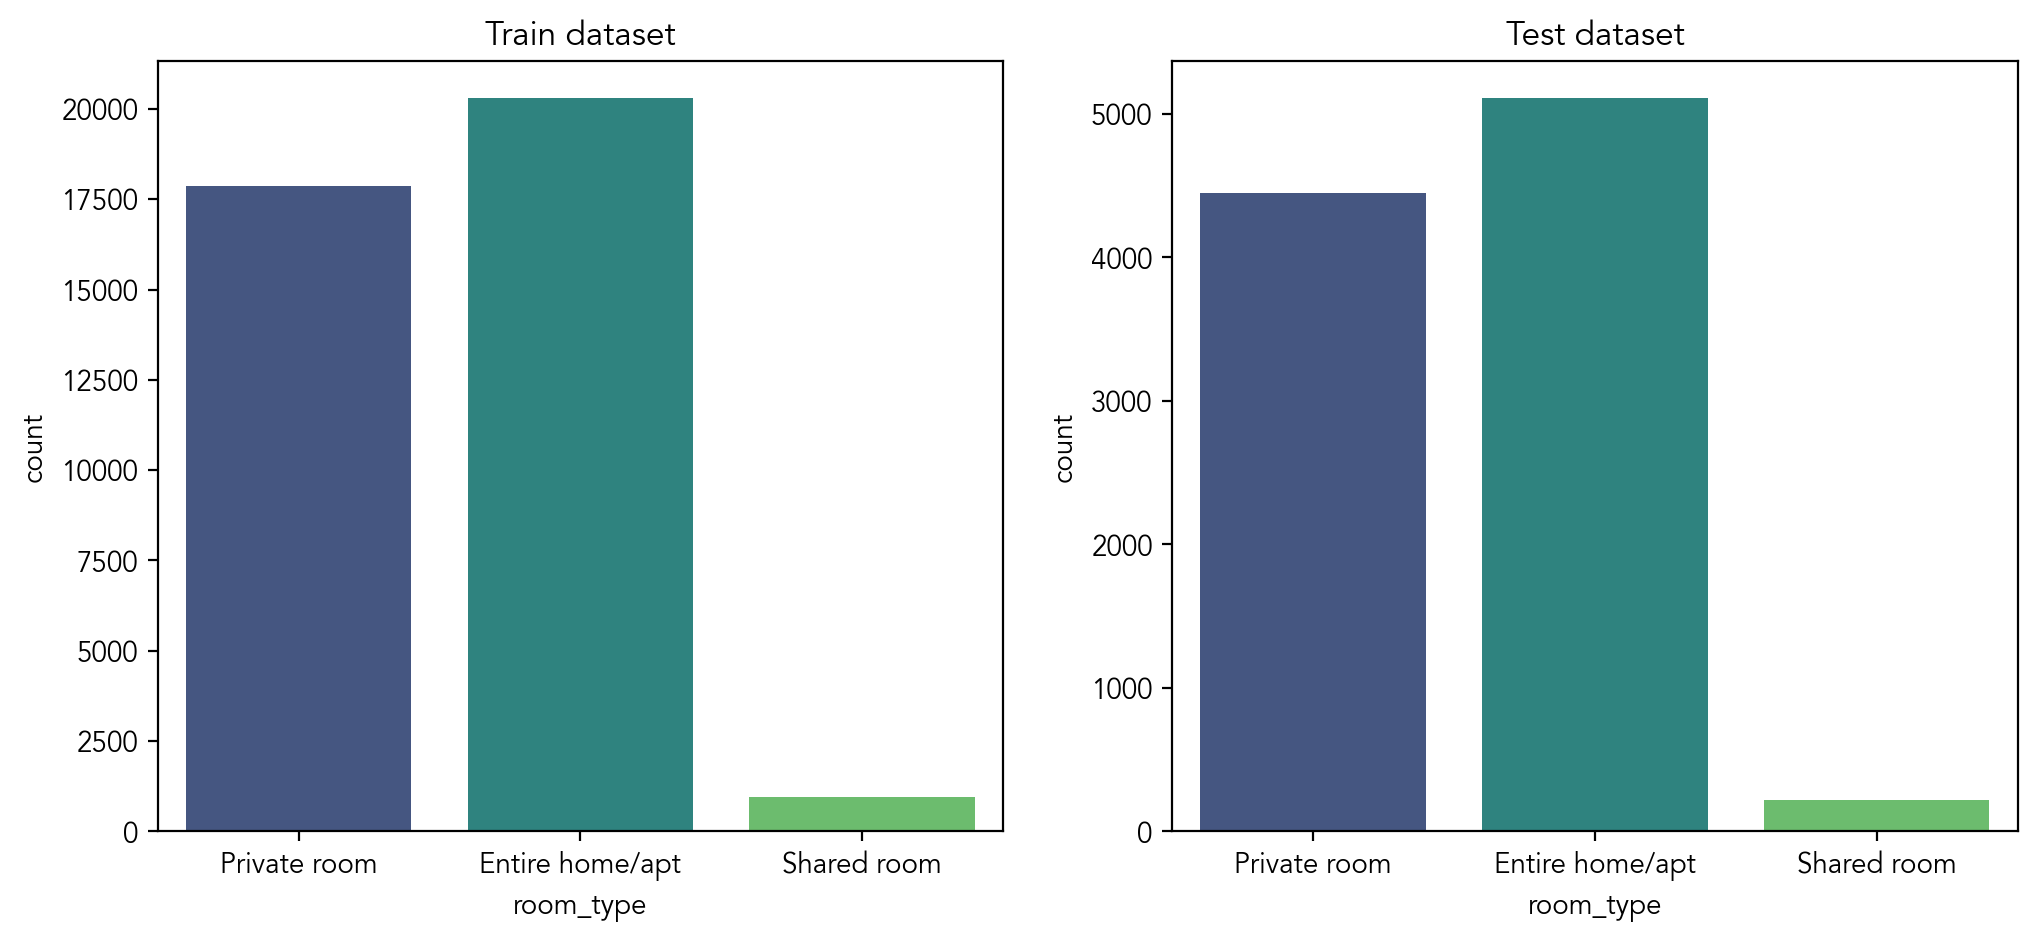

In [63]:
# Understanding the room_type
# >> It is either Private room or Entire home/apt in both train, and test datasets

f, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(data = train, x = 'room_type', ax = ax[0], palette = 'viridis')
ax[0].set_title('Train dataset')
sns.countplot(data = test, x = 'room_type', ax = ax[1], palette = 'viridis')
ax[1].set_title('Test dataset')

In [48]:
# Understanding availability_365

train['availability_365'].describe(), test['availability_365'].describe()

(count    39116.000000
 mean       112.980826
 std        131.674306
 min          0.000000
 25%          0.000000
 50%         45.000000
 75%        228.000000
 max        365.000000
 Name: availability_365, dtype: float64,
 count    9779.000000
 mean      111.983332
 std       131.417711
 min         0.000000
 25%         0.000000
 50%        44.000000
 75%       222.000000
 max       365.000000
 Name: availability_365, dtype: float64)

Text(0.5, 1.0, 'Test dataset')

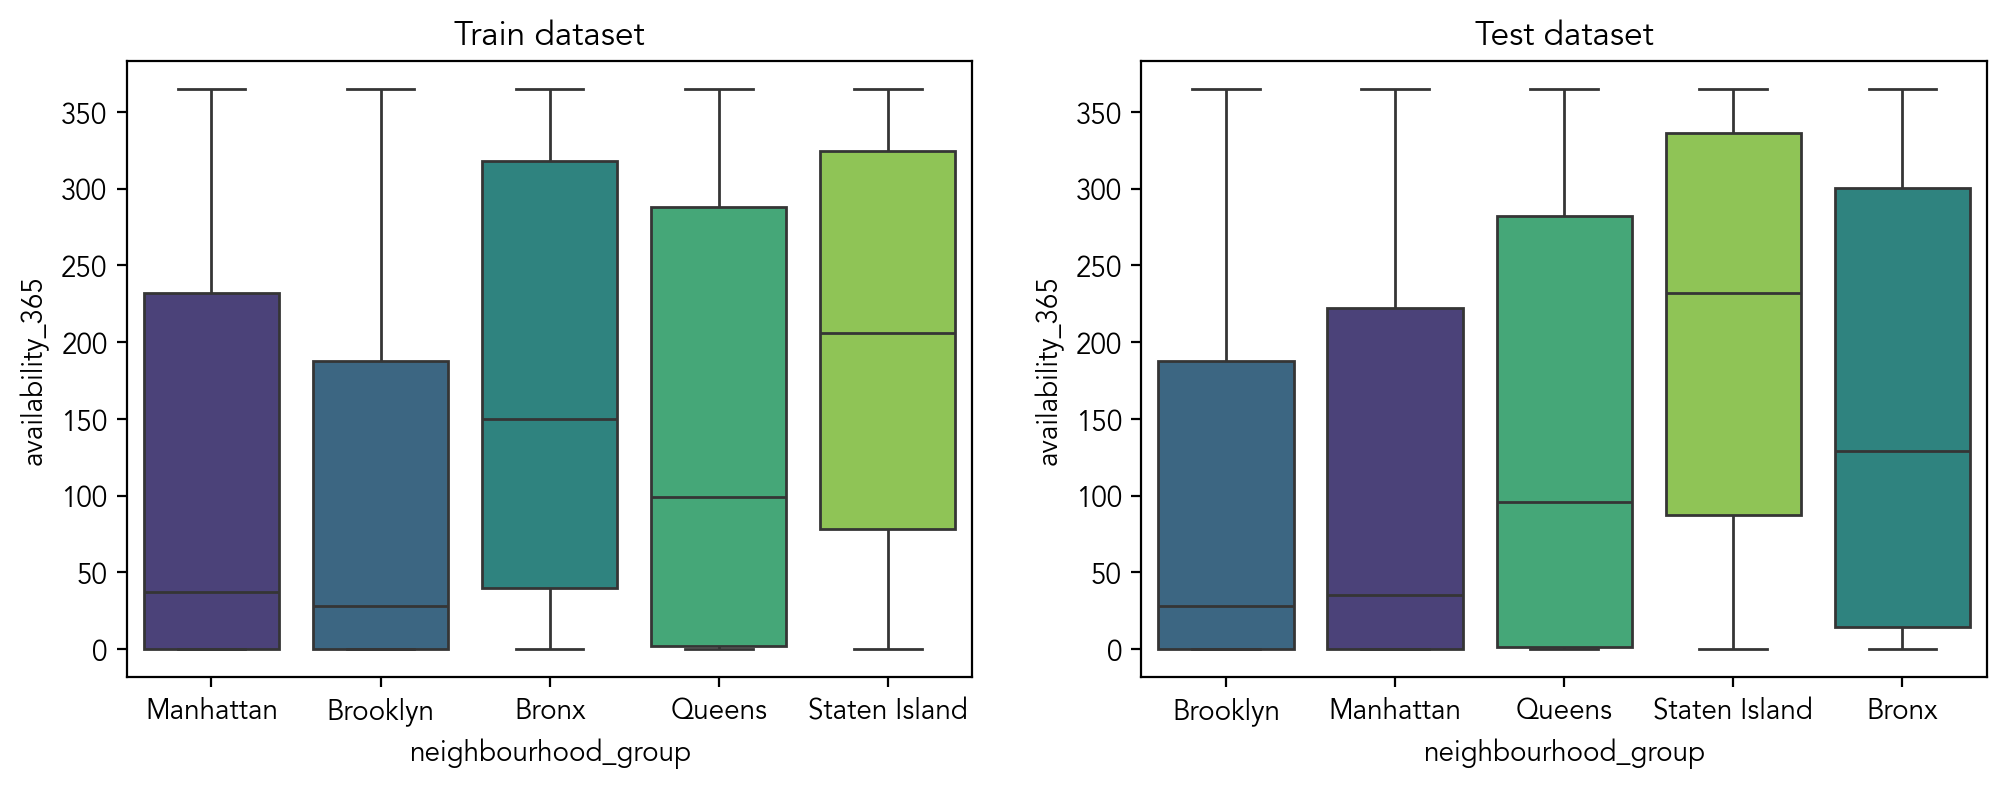

In [88]:
# Plot the availability_365 by neighbourhood_group
# >> While Manhattan and Brooklyn have less availability-365 than the other neighbourhood_group
# >> There are similar disbtibution of availability_365 in both train, and test datasets

# Get the unique categories
categories = train['neighbourhood_group'].unique()
# Create a color palette
palette = dict(zip(categories, sns.color_palette('viridis', n_colors=len(categories))))


f, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.boxplot(data = train, x = 'neighbourhood_group', y = 'availability_365', ax = ax[0], palette = palette)
ax[0].set_title('Train dataset')
sns.boxplot(data = test, x = 'neighbourhood_group', y = 'availability_365', ax = ax[1], palette = palette)
ax[1].set_title('Test dataset')

Text(0.5, 1.0, 'Test dataset')

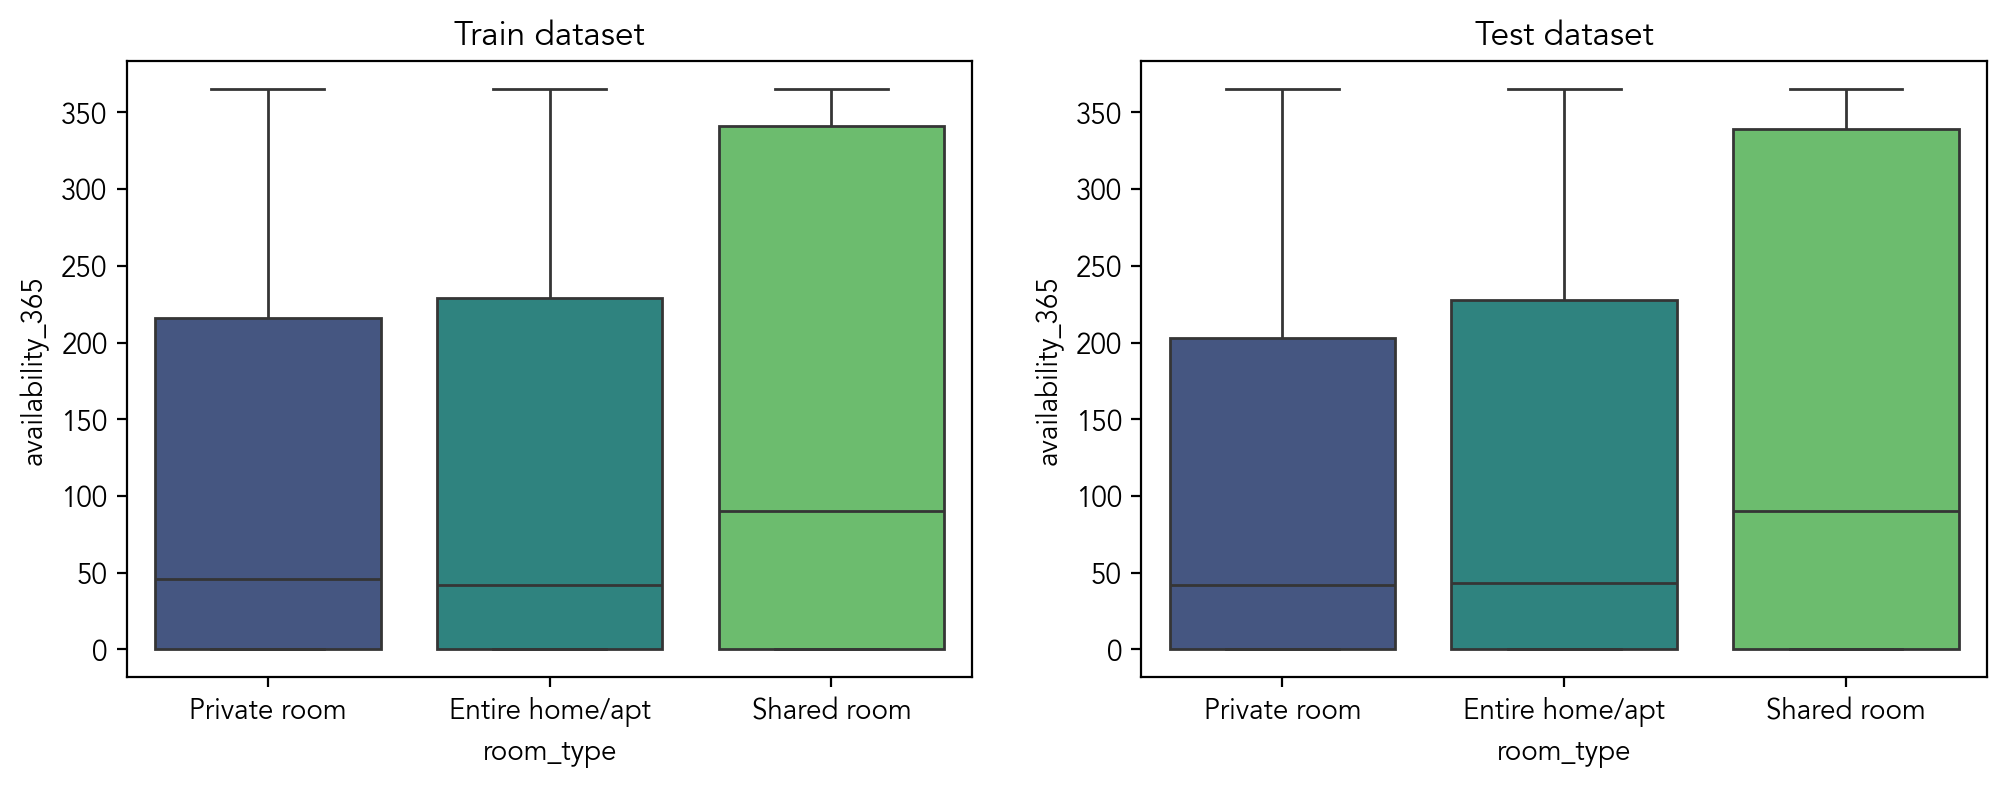

In [66]:
# Plot the availability_365 by room_type
# >> Shared room has more availability_365 than other room_type in both train, and test datasets

f, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.boxplot(data = train, x = 'room_type', y = 'availability_365', ax = ax[0], palette = 'viridis')
ax[0].set_title('Train dataset')
sns.boxplot(data = test, x = 'room_type', y = 'availability_365', ax = ax[1], palette = 'viridis')
ax[1].set_title('Test dataset')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

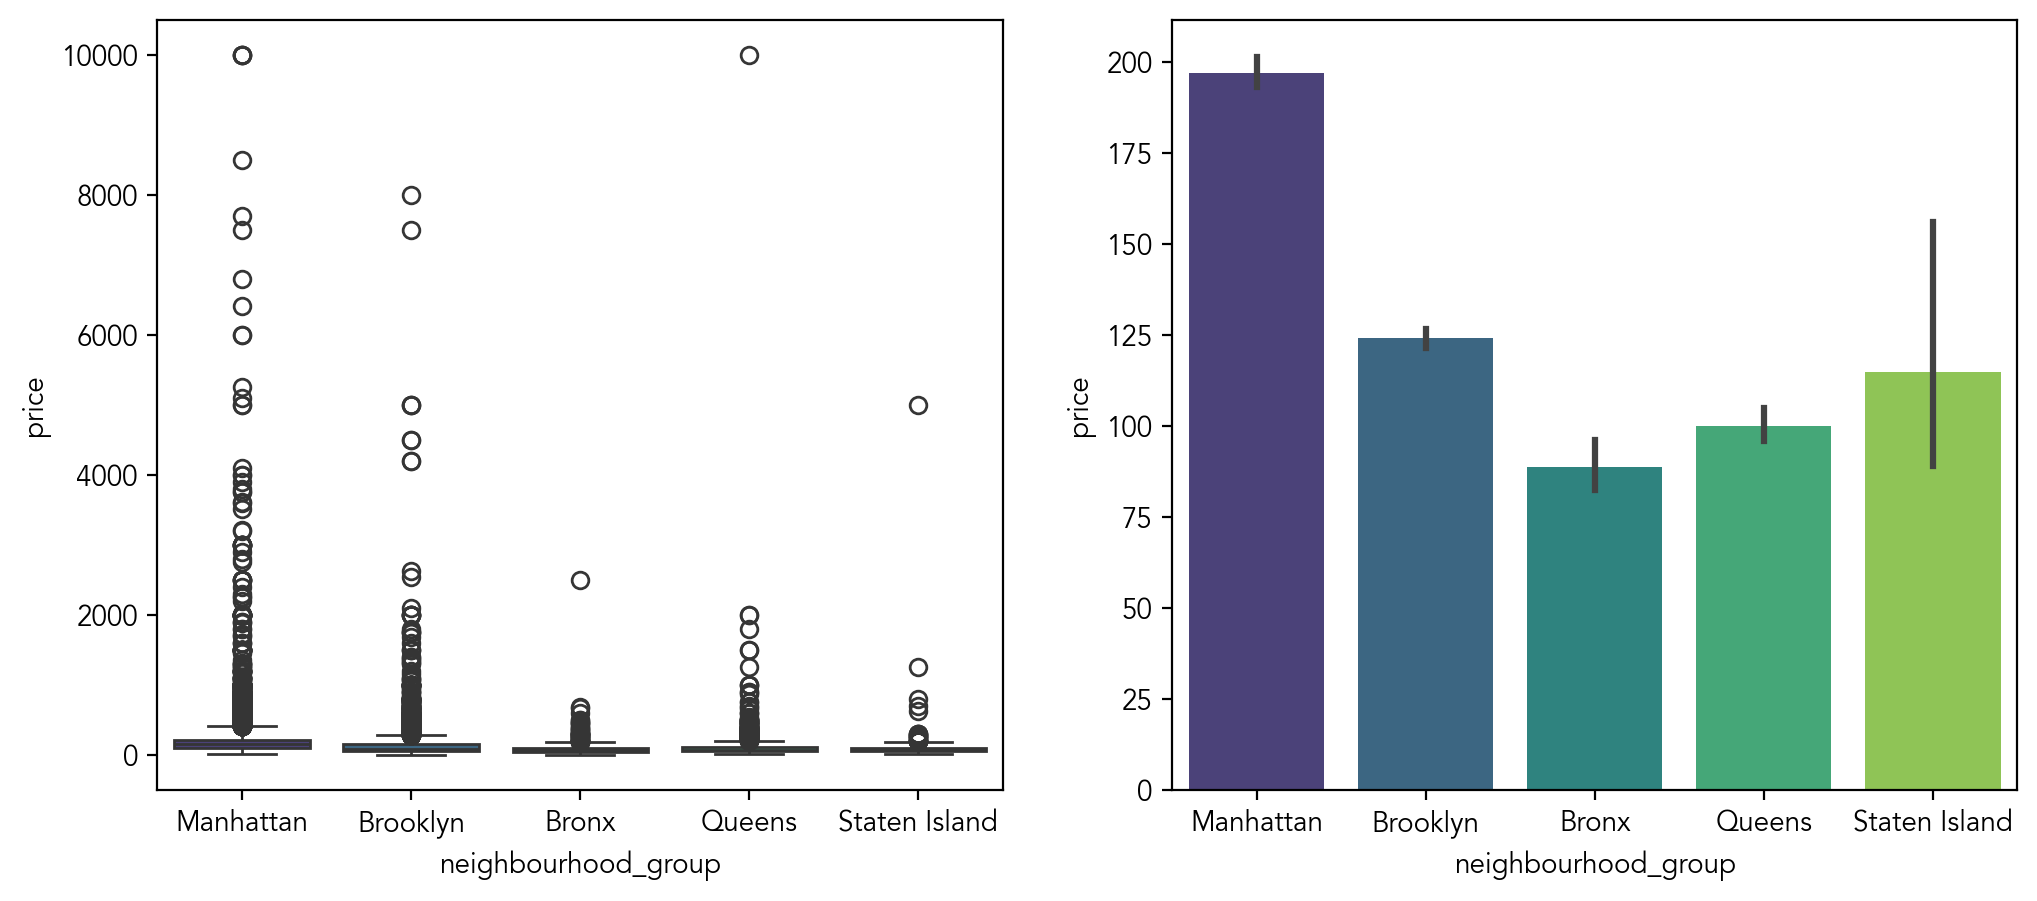

In [93]:
# Plot the price by neighbourhood_gruop

f, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.boxplot(data = train, x = 'neighbourhood_group', y = 'price', palette = 'viridis', ax = ax[0])
sns.barplot(data = train, x = 'neighbourhood_group', y = 'price', palette = 'viridis', ax = ax[1])


In [78]:
train.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False)

neighbourhood_group
Manhattan        197.049276
Brooklyn         124.076115
Staten Island    114.968966
Queens            99.961810
Bronx             88.820136
Name: price, dtype: float64

<Axes: xlabel='room_type', ylabel='price'>

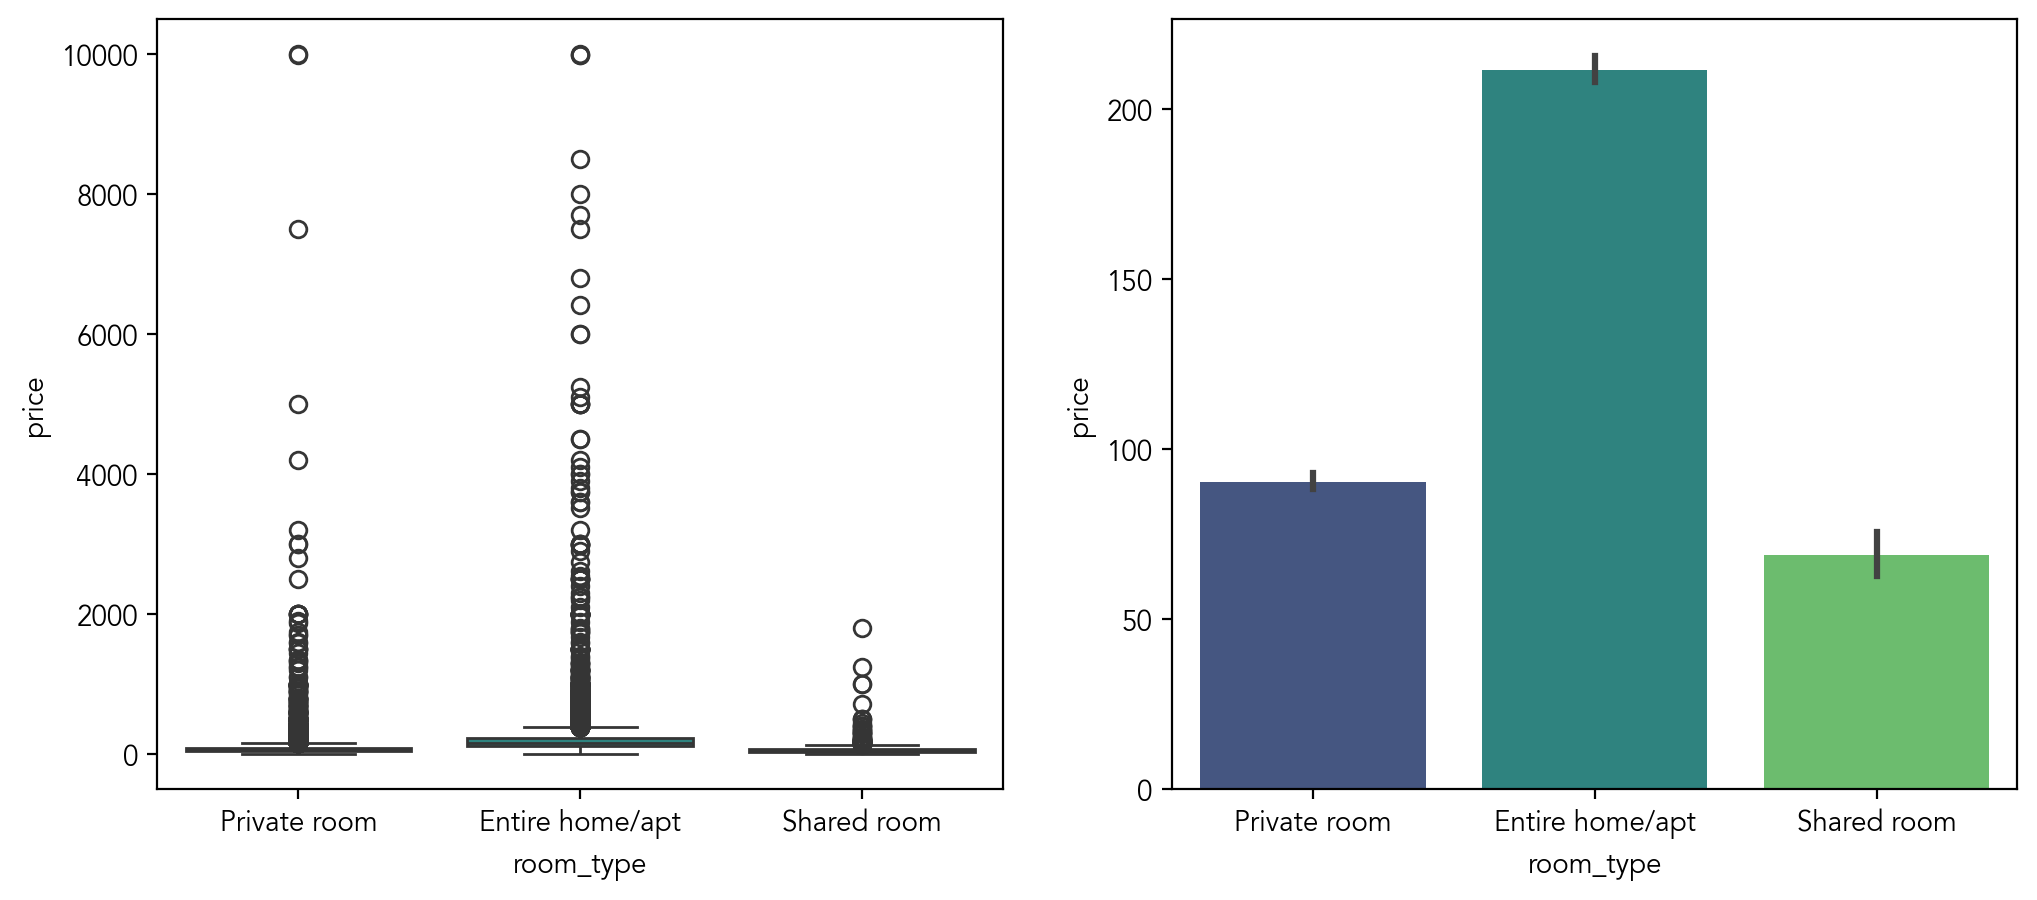

In [92]:
# Plot the price by room_type

f, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.boxplot(data = train, x = 'room_type', y = 'price', palette = 'viridis', ax = ax[0])
sns.barplot(data = train, x = 'room_type', y = 'price', palette = 'viridis', ax = ax[1])

In [80]:
train.groupby('room_type')['price'].mean().sort_values(ascending = False)

room_type
Entire home/apt    211.438642
Private room        90.519188
Shared room         68.969182
Name: price, dtype: float64

In [81]:
train.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              480.577778
Riverdale            467.250000
Battery Park City    411.684211
                        ...    
Grant City            54.800000
Olinville             53.000000
Soundview             52.846154
Hunts Point           52.125000
Bull's Head           47.333333
Name: price, Length: 221, dtype: float64

Text(0.5, 1.0, 'Test dataset')

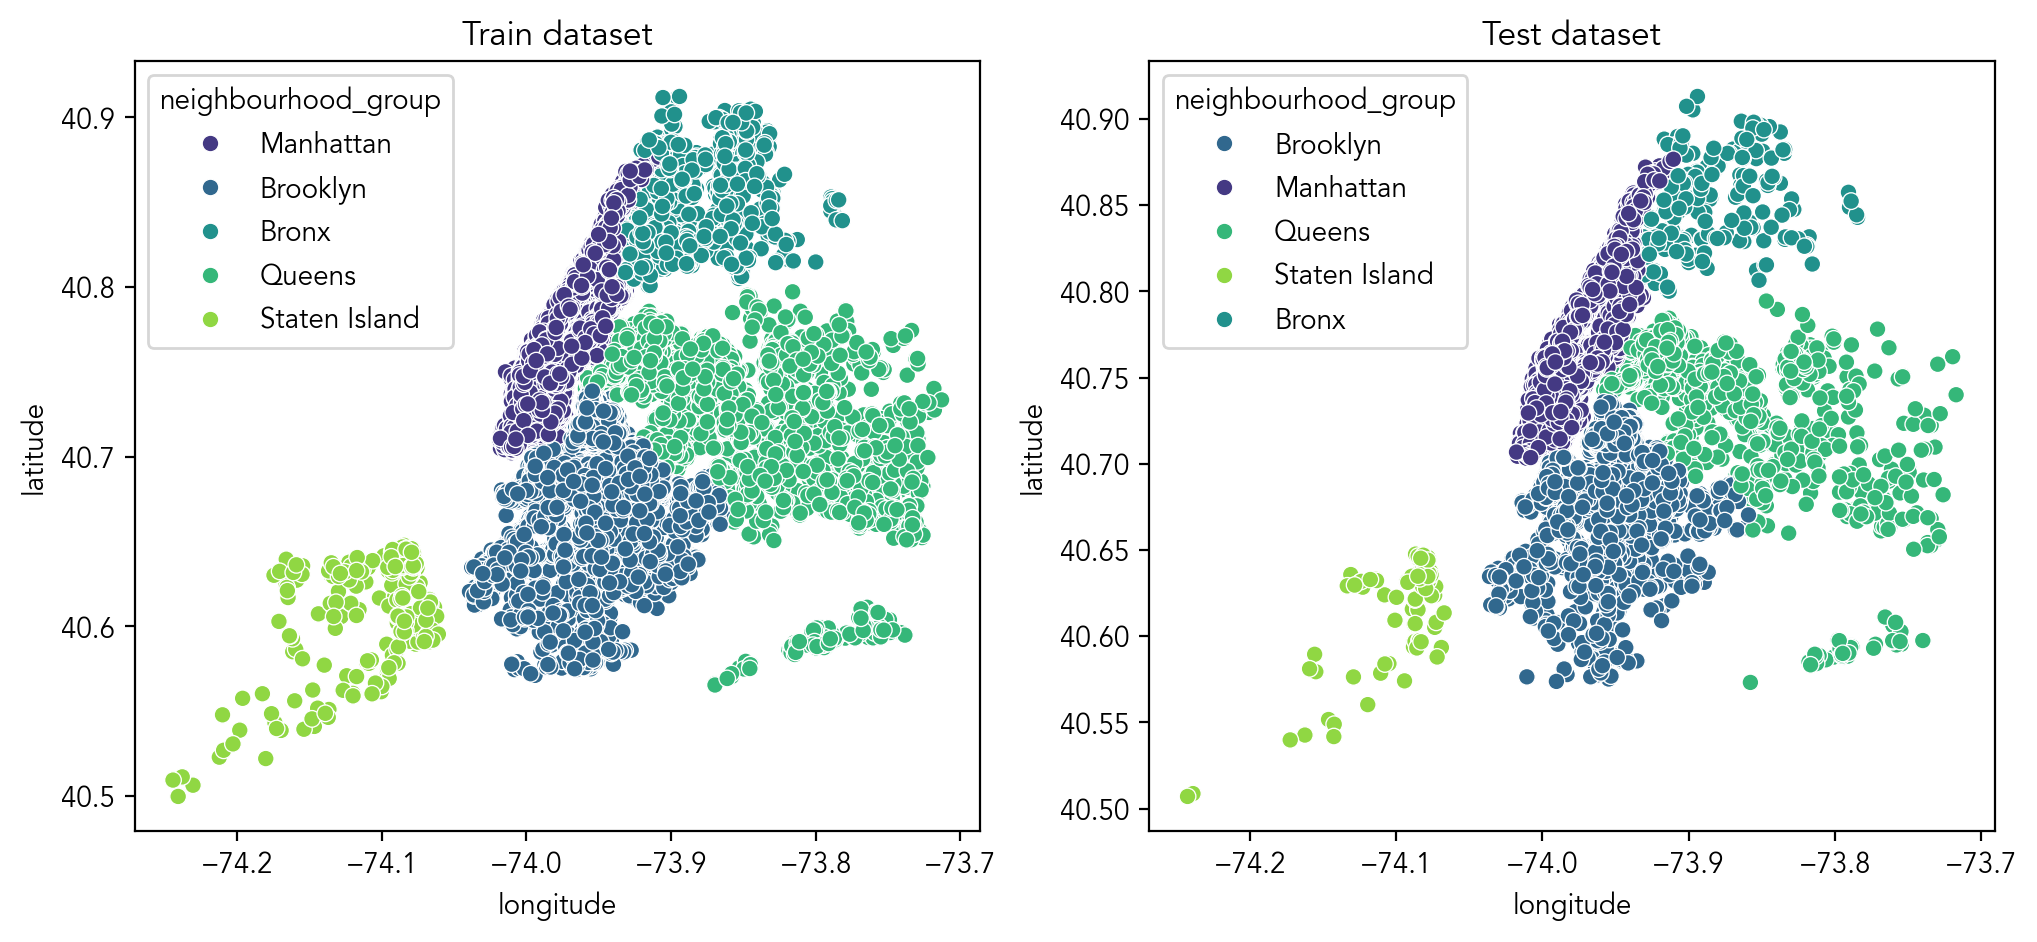

In [87]:
# Plot the locations of the airbnb based on the latitude and longitude

# Get the unique categories
categories = train['neighbourhood_group'].unique()
# Create a color palette
palette = dict(zip(categories, sns.color_palette('viridis', n_colors=len(categories))))

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.scatterplot(data=train, x='longitude', y='latitude', hue='neighbourhood_group', palette=palette, ax=ax[0])
ax[0].set_title('Train dataset')
sns.scatterplot(data=test, x='longitude', y='latitude', hue='neighbourhood_group', palette=palette, ax=ax[1])
ax[1].set_title('Test dataset')

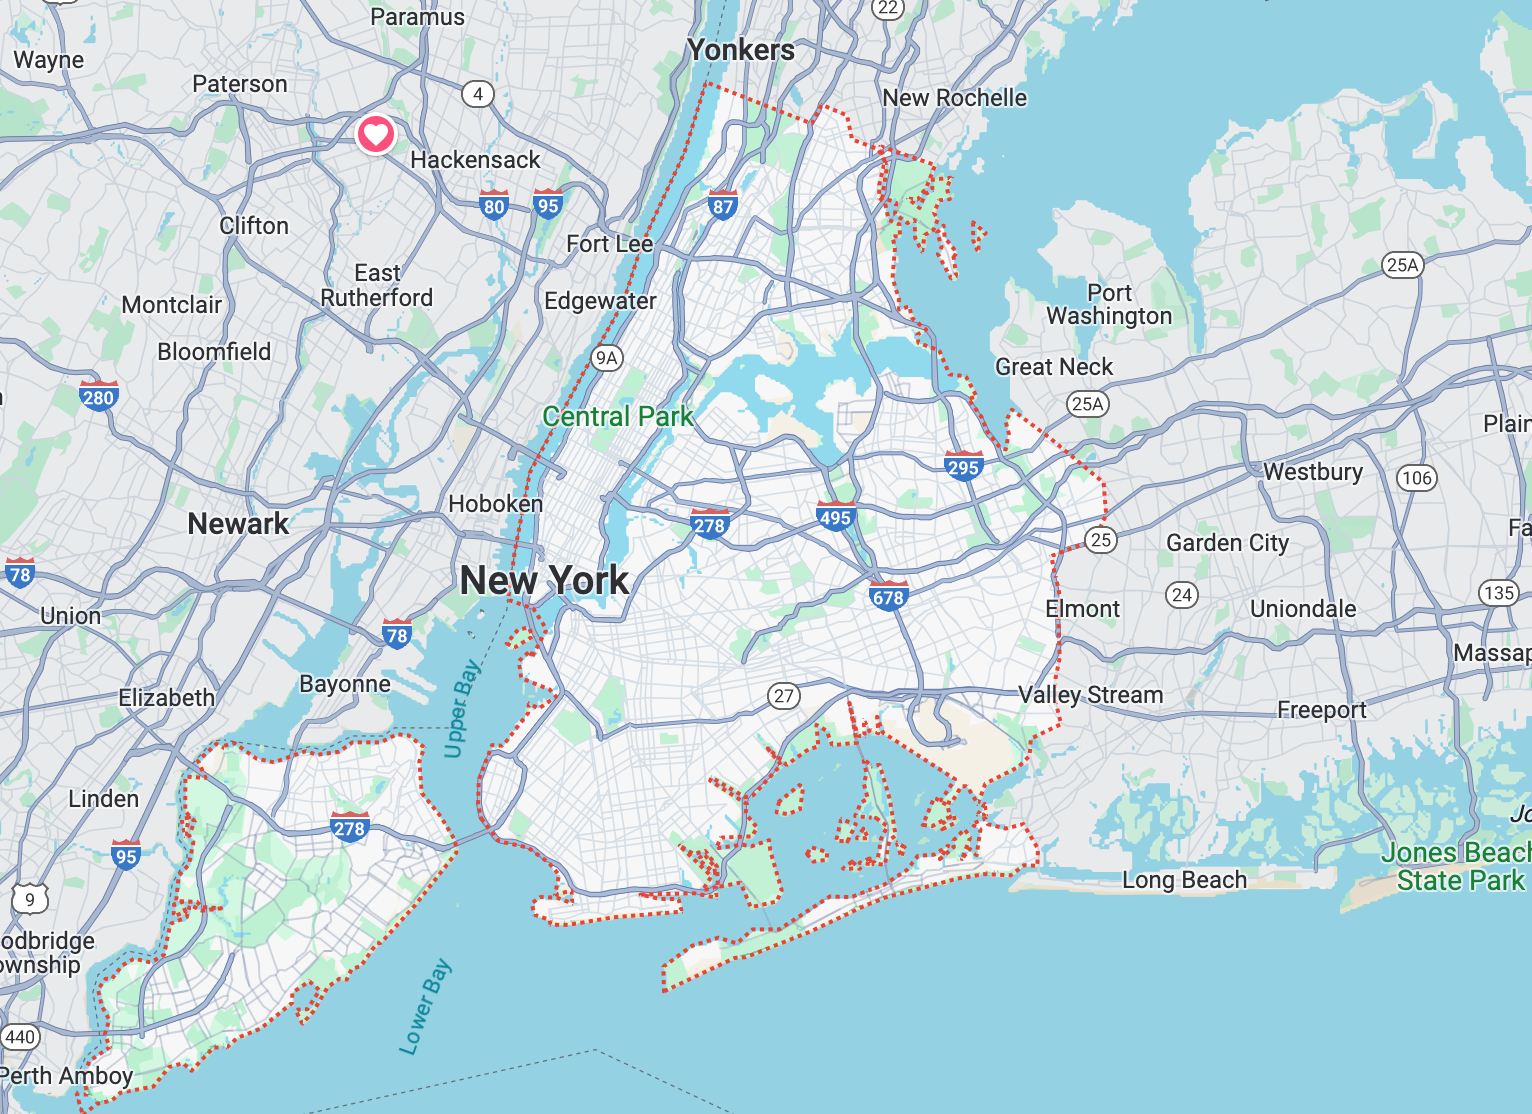

In [ ]:
fig = plt.figure(figsize = (15, 5))
sns.histplot(data = train, x = 'price', kde = True)

In [ ]:
train.describe().T

In [ ]:
# Drop missing data in 'last_review'
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [ ]:
display(train.head(3))
display(test.head(3))

In [ ]:
test.isnull().sum()

In [ ]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
target = train['price']
train = train.drop('price', axis=1)

In [ ]:
target.describe()

In [ ]:
train

In [ ]:
train['neighbourhood_group'].value_counts()

In [ ]:
train['neighbourhood'].value_counts()

In [ ]:
train['room_type'].value_counts()

In [ ]:
# Perform one-hot encoding on the specified features
train_encoded = pd.get_dummies(train, columns=['neighbourhood_group', 'room_type'])
test_encoded = pd.get_dummies(test, columns=['neighbourhood_group', 'room_type'])

# Align the train and test data to ensure they have the same columns
train, test = train_encoded.align(test_encoded, join='left', axis=1)

# Fill any new NaN values with 0
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to the 'neighbourhood' column in the training data
encoder.fit(train['neighbourhood'])

# Transform the 'neighbourhood' column in the training and test data
train['neighbourhood'] = encoder.transform(train['neighbourhood'])
test['neighbourhood'] = encoder.transform(test['neighbourhood'])

In [ ]:
train.head()

In [ ]:
target.head()

In [ ]:
train.columns

In [ ]:
cols = [
    'neighbourhood',
    'latitude',
    'longitude',
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365',
    'neighbourhood_group_Bronx', 
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan', 
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island', 
    'room_type_Entire home/apt',
    'room_type_Private room', 
    'room_type_Shared room'
    ]

train = train[cols]
test = test[cols]

In [ ]:
train

In [ ]:
train.describe().T

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['latitude','longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Fit the scaler to the columns in the training data and transform them
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

# Transform the same columns in the test data using the same scaler
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

In [ ]:
train

In [ ]:
test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.3, random_state=2024)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_val)
mean_squared_error(y_val, pred_rf)


In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train) 
pred_xgb = model_xgb.predict(X_val) 
mean_squared_error(y_val, pred_xgb) 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


params={'learning_rate':[0.07, 0.05, 0.03], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200, 300],
        'subsample':[0.9, 0.8, 0.7, 0.6]
        }


xgb = XGBRegressor()
grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
xgb = XGBRegressor(
    learning_rate=0.03, 
    max_depth=7, 
    n_estimators=100, 
    subsample=0.6)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
print(mean_squared_error(y_val, pred))

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_val)
print('mean_squared_error:', mean_squared_error(y_val, pred_lr))
print('mean_absolute_error:', mean_absolute_error(y_val, pred_lr))
print('r2_score:', r2_score(y_val, pred_lr))

In [ ]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_val)
print('mean_squared_error:', mean_squared_error(y_val, pred_ridge))
print('mean_absolute_error:', mean_absolute_error(y_val, pred_ridge))
print('r2_score:', r2_score(y_val, pred_ridge))

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test, pred_lasso))
print('mean_absolute_error:', mean_absolute_error(y_test, pred_lasso))
print('r2_score:', r2_score(y_test, pred_lasso))

In [ ]:
model_en = ElasticNet()
model_en.fit(X_train, y_train)
pred_en = model_en.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test, pred_en))
print('mean_absolute_error:', mean_absolute_error(y_test, pred_en))
print('r2_score:', r2_score(y_test, pred_en))